In [1]:

# Import midi file and play it
import pygame
import time
import sys

def play_midi(midi_file):
    pygame.mixer.music.load(midi_file)
    pygame.mixer.music.play()
    while pygame.mixer.music.get_busy():
        time.sleep(1)


midi_folder = "./midis_v1.2/midis/"

# Pick first midi file in the folder
import os
for file in os.listdir(midi_folder):
    if file.endswith(".mid"):
        midi_file = midi_folder + file

print("Playing", midi_file)

pygame.init()
play_midi(midi_file)
pygame.quit()
sys.exit(0)

pygame 2.5.2 (SDL 2.28.2, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html
Playing ./midis_v1.2/midis/Wolf, Ernst Wilhelm, Sonata for Keyboard 3-Hands in F major, --hlZ49Tp74.mid


KeyboardInterrupt: 

In [2]:

pygame.quit()

Midi file: ./midis_v1.2/midis/Wolf, Ernst Wilhelm, Sonata for Keyboard 3-Hands in F major, --hlZ49Tp74.mid
Duration:  197.51171875  seconds
Number of instruments: 1


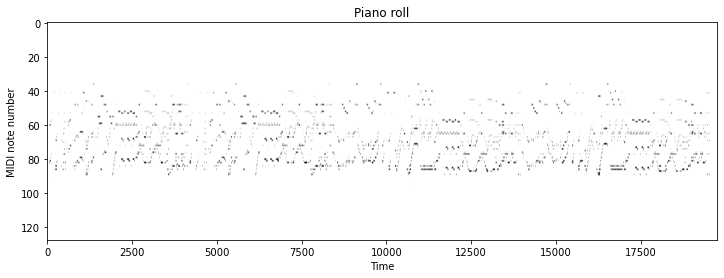

In [3]:
!pip install pretty_midi
# Open midi file and convert it to audio
import pretty_midi
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd


# Load MIDI file into PrettyMIDI object
midi_data = pretty_midi.PrettyMIDI(midi_file)

# Print some stats
print("Midi file:", midi_file)
print("Duration: ", midi_data.get_end_time(), " seconds")
print("Number of instruments:", len(midi_data.instruments))


# Plot piano roll
piano_roll = midi_data.get_piano_roll()
plt.figure(figsize=(12, 4))
plt.imshow(piano_roll, aspect='auto', cmap='gray_r')
plt.xlabel('Time')
plt.ylabel('MIDI note number')
plt.title('Piano roll')
plt.show()



In [21]:
# Create a dataloader for the midi files in the folder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import os
import numpy as np
import pretty_midi


class MidiDataset(Dataset):
    def __init__(self, midi_folder):
        self.midi_folder = midi_folder
        self.midi_files = [midi_folder + file for file in os.listdir(midi_folder) if file.endswith(".mid")]

    def __len__(self):
        return len(self.midi_files)

    def __getitem__(self, idx):
        midi_file = self.midi_files[idx]
        midi_data = pretty_midi.PrettyMIDI(midi_file)
        piano_roll = midi_data.get_piano_roll()
        # Convert piano roll to sound
        return piano_roll




midi_folder = "./midis_v1.2/midis/"
midi_dataset = MidiDataset(midi_folder)

# Use the dataloader to create a train and test set
train_size = int(0.8 * len(midi_dataset))
test_size = len(midi_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(midi_dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)


In [7]:
!pip install fluidsynth
!pip install pyfluidsynth
midi_data


# Use synth to play midi_data
import fluidsynth
import pretty_midi

# Synthesize the audio using FluidSynth
synth = pretty_midi.fluidsynth.Synth()
synth.start()
soundfont_path = "path_to_your_soundfont.sf2"
synth.sfload(soundfont_path)
audio = synth.get_samples(midi, fs=44100)

# Save the audio to a file
sf.write('output.wav', audio, 44100)

# Play the audio (optional, requires simpleaudio library)
import simpleaudio as sa
play_obj = sa.play_buffer(audio, 1, 2, 44100)
play_obj.wait_done()

AttributeError: module 'fluidsynth' has no attribute 'Synth'

In [10]:
!pip install pydub

import os
from pydub import AudioSegment
def midi_to_mp3(midi_file, soundfont, mp3_file):
    # Convert MIDI to WAV using fluidsynth
    wav_file = mp3_file.replace('.mp3', '.wav')
    print(f'Converting {midi_file} to {mp3_file}')
    os.system(f'fluidsynth -ni {soundfont} {midi_file} -F {wav_file} -r 44100')
    print(f'Converting : {os.system(f"fluidsynth -ni {soundfont} {midi_file} -F {wav_file} -r 44100")} ')
    # Convert WAV to MP3 using pydub
    audio = AudioSegment.from_wav(wav_file)
    audio.export(mp3_file, format='mp3')
    # Remove temporary WAV file
    os.remove(wav_file)
# Example usage:


midi_folder = "./midis_v1.2/midis/"

# Pick first midi file in the folder
import os
for file in os.listdir(midi_folder):
    if file.endswith(".mid"):
        midi_file = midi_folder + file
        break
    
soundfont = 'path/to/GeneralUser GS.sf2'
mp3_file = 'output.mp3'
midi_to_mp3(midi_file, soundfont, mp3_file)



Converting ./midis_v1.2/midis/Zwaag, Wim, Intermezzo No.2, 20Gb0JcviRA.mid to output.mp3
FluidSynth runtime version 2.3.3
Copyright (C) 2000-2023 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

FluidSynth runtime version 2.3.3
Copyright (C) 2000-2023 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Converting : 65280 


fluidsynth: error: fluid_is_soundfont(): fopen() failed: 'File does not exist.'
Parameter 'path/to/GeneralUser' not a SoundFont or MIDI file or error occurred identifying it.
fluidsynth: error: fluid_is_soundfont(): fopen() failed: 'File does not exist.'
Parameter 'GS.sf2' not a SoundFont or MIDI file or error occurred identifying it.
fluidsynth: error: fluid_is_soundfont(): fopen() failed: 'File does not exist.'
Parameter './midis_v1.2/midis/Zwaag,' not a SoundFont or MIDI file or error occurred identifying it.
fluidsynth: error: fluid_is_soundfont(): fopen() failed: 'File does not exist.'
Parameter 'Wim,' not a SoundFont or MIDI file or error occurred identifying it.
fluidsynth: error: fluid_is_soundfont(): fopen() failed: 'File does not exist.'
Parameter 'Intermezzo' not a SoundFont or MIDI file or error occurred identifying it.
fluidsynth: error: fluid_is_soundfont(): fopen() failed: 'File does not exist.'
Parameter 'No.2,' not a SoundFont or MIDI file or error occurred identifying

FileNotFoundError: [Errno 2] No such file or directory: 'output.wav'

In [2]:
!pip install midi2audio
from midi2audio import FluidSynth


midi_folder = "./midis_v1.2/midis/"

# Pick first midi file in the folder
import os
for file in os.listdir(midi_folder):
    if file.endswith(".mid"):
        midi_file = midi_folder + file
        break
    
fs = FluidSynth()
fs.midi_to_audio(midi_file, "example.wav")

FileNotFoundError: [Errno 2] No such file or directory: './midis_v1.2/midis/'